# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [34]:
# Initial imports
import json

import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/niccolomerlatti/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [36]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [133]:
# Fetch the Bitcoin news articles
def create_df(news, language):
    btc_news = newsapi.get_everything(q='bitcoin',
                language='en',
                sort_by='relevancy')

    
    articles = []
    for article in news['articles']:
        try:
            sentiment = analyzer.polarity_scores(article["description"])
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            
            articles.append({
                "Title": title,
                "Description": description,
                "Text": text,
                "Date": date,
                "Compound": sentiment["compound"],
                "Positive": sentiment["pos"],
                "Negative": sentiment["neg"],
                "Neutral": sentiment["neu"],
            })
        except AttributeError:
            pass
    
    return pd.DataFrame(articles)

In [134]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = create_df(btc_news, 'en')
btc_df.head()

,Title,Description,Text,Date,Compound,Positive,Negative,Neutral
0,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...","Now, even though there are a number of women-f...",2022-05-10,-0.4019,0.000,0.184,0.816
1,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.5423,0.000,0.191,0.809
2,Wikipedia editors vote to block cryptocurrency...,Wikipedia editors have voted in favor of dropp...,Wikipedia editors have voted in favor of dropp...,2022-04-14,0.4767,0.131,0.054,0.815
3,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.069,0.117,0.814
4,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,-0.0258,0.121,0.126,0.754


In [135]:
# Fetch the Ethereum news articles
def create_df(news, language):
    eth_news = newsapi.get_everything(q='ethereum',
                language='en',
                sort_by='relevancy')

    
    articles = []
    for article in news['articles']:
        try:
            sentiment = analyzer.polarity_scores(article["description"])
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            
            articles.append({
                "Title": title,
                "Description": description,
                "Text": text,
                "Date": date,
                "Compound": sentiment["compound"],
                "Positive": sentiment["pos"],
                "Negative": sentiment["neg"],
                "Neutral": sentiment["neu"],
            })
        except AttributeError:
            pass
    
    return pd.DataFrame(articles)

In [132]:
# Create the Ethereum sentiment scores DataFrame
eth_df = create_df(eth_news, 'en')
eth_df.head()

,Title,Description,Text,Date,Compound,Positive,Negative,Neutral
0,US blames North Korean hacker group for $625 m...,The US Department of Treasury has attributed t...,The US Department of Treasury says Lazarus is ...,2022-04-14,0.5994,0.176,0.000,0.824
1,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,2022-05-10,0.7783,0.154,0.000,0.846
2,Opera's crypto browser is now available on iOS,"Opera launched its dedicated ""Crypto Browser"" ...","Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15,0.4767,0.113,0.000,0.887
3,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2350,0.070,0.093,0.836
4,How Bored Ape Yacht Club Broke Ethereum - CNET,"Transactions stalled for hours, and people pai...",When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,0.2500,0.151,0.097,0.753


In [51]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Comp,Pos,Neu,Neg
count,100.000000,100.000000,100.000000,100.00000
mean,-0.047664,0.060760,0.863390,0.07585
std,0.418163,0.078553,0.108858,0.08969
min,-0.855500,0.000000,0.575000,0.00000
25%,-0.401900,0.000000,0.812750,0.00000
50%,0.000000,0.000000,0.862000,0.05000
75%,0.316850,0.107500,0.950250,0.14400
max,0.827100,0.393000,1.000000,0.35100


In [395]:
# Describe the Ethereum Sentiment
eth_df.describe()


,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.102025,0.054650,0.091500,0.853800
std,0.469033,0.065709,0.087068,0.082447
min,-0.855500,0.000000,0.000000,0.720000
25%,-0.386825,0.000000,0.000000,0.810250
50%,-0.218650,0.026500,0.074500,0.851000
75%,0.266600,0.086000,0.148500,0.896000
max,0.778300,0.176000,0.261000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score with 0.071240 against Bitcoins 0.060760.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest max compound score with it being 0.827100 against Ethereums 0.778300 but Ethereum had a higher mean compound score with 0.023201 against Bitcoins 0.047664.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score of the two being 0.393000 against Ethereums 0.333000.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [239]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [371]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary
sw_expand = {'week', 'also', 'found', 'including', 'today', 'announced', 'said', 'basically','ha', 'sent'}


In [372]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_expand)]
    
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    stwords = [w for w in words if not w in stop_words]
    
    return tokens

In [373]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['Text'].apply(word_tokenize)
btc_df.head()

,Title,Description,Text,Date,Compound,Positive,Negative,Neutral,tokens,btc tokens,Tokens
0,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...","Now, even though there are a number of women-f...",2022-05-10,-0.4019,0.000,0.184,0.816,"[Now, ,, even, though, there, are, a, number, ...","[Now, ,, even, though, there, are, a, number, ...","[Now, ,, even, though, there, are, a, number, ..."
1,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.5423,0.000,0.191,0.809,"[A, Bitcoin, mining, site, powered, by, otherw...","[A, Bitcoin, mining, site, powered, by, otherw...","[A, Bitcoin, mining, site, powered, by, otherw..."
2,Wikipedia editors vote to block cryptocurrency...,Wikipedia editors have voted in favor of dropp...,Wikipedia editors have voted in favor of dropp...,2022-04-14,0.4767,0.131,0.054,0.815,"[Wikipedia, editors, have, voted, in, favor, o...","[Wikipedia, editors, have, voted, in, favor, o...","[Wikipedia, editors, have, voted, in, favor, o..."
3,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.069,0.117,0.814,"[Warren, Buffett, has, always, been, a, bitcoi...","[Warren, Buffett, has, always, been, a, bitcoi...","[Warren, Buffett, has, always, been, a, bitcoi..."
4,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,-0.0258,0.121,0.126,0.754,"[Image, source, ,, Getty, Images, The, value, ...","[Image, source, ,, Getty, Images, The, value, ...","[Image, source, ,, Getty, Images, The, value, ..."


In [374]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['Text'].apply(word_tokenize)
eth_df.head()

,Title,Description,Text,Date,Compound,Positive,Negative,Neutral,tokens
0,US blames North Korean hacker group for $625 m...,The US Department of Treasury has attributed t...,The US Department of Treasury says Lazarus is ...,2022-04-14,0.5994,0.176,0.000,0.824,"[The, US, Department, of, Treasury, says, Laza..."
1,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,2022-05-10,0.7783,0.154,0.000,0.846,"[Meta, has, revealed, more, of, how, NFTs, wil..."
2,Opera's crypto browser is now available on iOS,"Opera launched its dedicated ""Crypto Browser"" ...","Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15,0.4767,0.113,0.000,0.887,"[Opera, launched, its, dedicated, ``, Crypto, ..."
3,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2350,0.070,0.093,0.836,"[A, multi-billion, dollar, cryptocurrency, com..."
4,How Bored Ape Yacht Club Broke Ethereum - CNET,"Transactions stalled for hours, and people pai...",When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,0.2500,0.151,0.097,0.753,"[When, Bored, Ape, Yacht, Club, creators, Yuga..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [375]:
from collections import Counter
from nltk import ngrams

In [376]:
# Generate the Bitcoin N-grams where N=2
def word_counter(corpus): 
    string = ' '.join(corpus.Text)
    processed = tokenizer(string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

word_counter(btc_df)

,bigram,count
0,"(reuters, bitcoin)",5
1,"(previous, closebitcoin)",4
2,"(closebitcoin, world)",4
3,"(world, biggest)",4
4,"(biggest, bestknown)",4
5,"(bestknown, cryptocurrency)",4
6,"(may, reuters)",4
7,"(char, may)",3
8,"(b, char)",2
9,"(bitcoin, dropped)",2


In [377]:
# Generate the Ethereum N-grams where N=2
word_counter(eth_df)

,bigram,count
0,"(reuters, bitcoin)",4
1,"(previous, closebitcoin)",4
2,"(closebitcoin, world)",4
3,"(world, biggest)",4
4,"(biggest, bestknown)",4
5,"(bestknown, cryptocurrency)",4
6,"(char, may)",3
7,"(may, reuters)",3
8,"(yacht, club)",2
9,"(char, april)",2


In [378]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [379]:
# Use token_count to get the top 10 words for Bitcoin
top10_btc = ' '.join(btc_df.Text)
prepared_btc = tokenizer(top10_btc) 
token_count(prepared_btc)

[('char', 19),
 ('cryptocurrency', 12),
 ('bitcoin', 11),
 ('world', 6),
 ('reuters', 5),
 ('online', 4),
 ('investor', 4),
 ('dropped', 4),
 ('previous', 4),
 ('closebitcoin', 4)]

In [380]:
# Use token_count to get the top 10 words for Ethereum
top10_eth = ' '.join(eth_df.Text)
prepared_eth = tokenizer(top10_eth) 
token_count(prepared_eth)

[('char', 20),
 ('cryptocurrency', 7),
 ('bitcoin', 7),
 ('ethereum', 6),
 ('biggest', 5),
 ('reuters', 5),
 ('world', 5),
 ('may', 5),
 ('april', 4),
 ('year', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [381]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

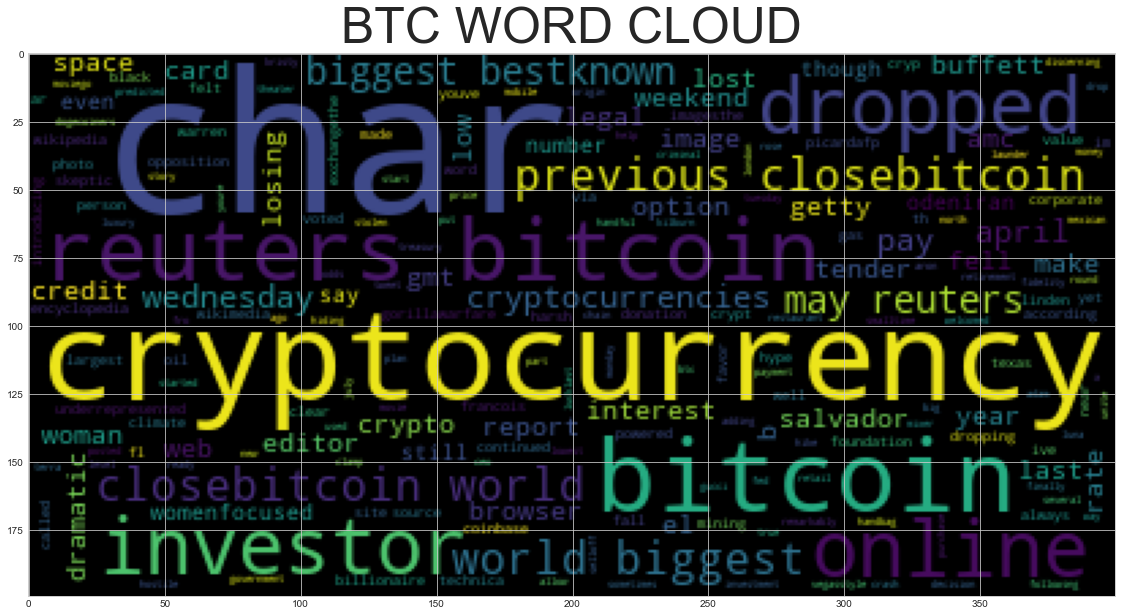

In [382]:
# Generate the Bitcoin word cloud
btc_string = ' '.join(prepared_btc)
btc_text = process_text(btc_string)
plt.title("BTC WORD CLOUD",fontsize=50)
wc = WordCloud().generate(btc_text)
plt.imshow(wc)

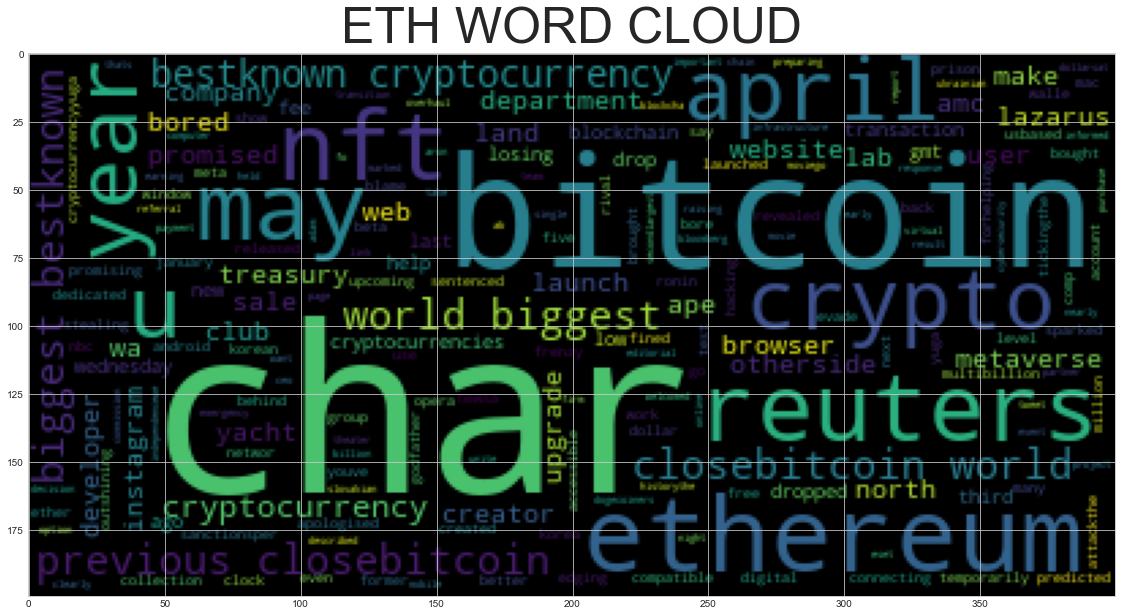

In [383]:
# Generate the Ethereum word cloud
eth_string = ' '.join(prepared_eth)
eth_text = process_text(eth_string)
plt.title("ETH WORD CLOUD",fontsize=50)
wc = WordCloud().generate(eth_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [384]:
import spacy
from spacy import displacy

In [385]:
# Download the language model for SpaCy
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 264 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/en_core_web_sm -->
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [386]:
# Load the spaCy model
nlp = spacy.load('en')

---
### Bitcoin NER

In [387]:
# Concatenate all of the Bitcoin text together
concatenate_btc = btc_df['Description'].str.cat(sep=', ')


In [388]:
# Run the NER processor on all of the text
doc = nlp(concatenate_btc)
# Add a title to the document
doc.user_data["title"] = "Bitcoin NER Analysis"


In [389]:
# Render the visualization
displacy.render(doc, style='ent')


In [390]:
# List all Entities
for ent in doc.ents:
    print(ent.text + ' ' + ent.label_)


ExxonMobil ORG
Bitcoin PERSON
Wikipedia ORG
the Wikimedia Foundation's ORG
Ars Technica PERSON
GorillaWarfare ORG
Warren Buffett PERSON
the weekend DATE
Buffett PERSON
the US Treasury ORG
first ORDINAL
Bitcoin PERSON
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
Bitcoin PERSON
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
Bitcoin PERSON
Gucci NORP
week DATE
Kristy Kilburn PERSON
Bitcoin PERSON
7.23% PERCENT
28,758.29 MONEY
22:05 GMT QUANTITY
Wednesday DATE
2,241.68 MONEY
Bitcoin PERSON
BTC ORG
Below $33000 MONEY
Bitcoin PERSON
50% PERCENT
last one year DATE
Economic Times ORG
Bitcoin PERSON
7.81% PERCENT
31,333.41 MONEY
20:03 GMT TIME
Monday DATE
2,655.98 MONEY
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
Doge GPE
Opera ORG
Crypto Browser WORK_OF_ART
January DATE
Windows, Mac ORG
iOS CARDINAL
Bitcoin PERSON
second ORDINAL
El Salvador GPE
first ORDINAL
September DATE


---

### Ethereum NER

In [391]:
# Concatenate all of the Ethereum text together
eth_concatenate = ' '.join(eth_df.Text)

In [392]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_concatenate)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER Analysis"


In [393]:
# Render the visualization
displacy.render(eth_doc, style='ent')


In [394]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text + ' ' + ent.label_)

The US Department of Treasury ORG
Lazarus PERSON
The US Treasury Department ORG
North Korean NORP
Lazarus GPE
$625 million MONEY
Ronin ORG
Instagram ORG
US GPE
Opera ORG
Crypto Browser WORK_OF_ART
January DATE
Windows, Mac ORG
billion dollar MONEY
Ethereum LAW
Yuga Labs PERSON
Yuga Labs PERSON
Otherside NFT ORG
April 30 DATE
NFT ORG
Bore PERSON
Ethereum PRODUCT
more than five years DATE
100,000 MONEY
North Korea GPE
US GPE
NBC News ORG
April 26 DATE
Reuters ORG
Ethereum PRODUCT
second ORDINAL
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
moviego PERSON
Last night TIME
Bloomberg PERSON
nearly a third CARDINAL
a billion dollars MONEY
us GPE
Early this week DATE
the Ukrainian Computer Emergency Response Team ORG
Slovakian NORP
Russia GPE
GRU Sandworm ORG
40 days ago DATE
Bitcoin PERSON
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Bitcoin PERSON
One CARDINAL
Ethereum PRODUCT
Merge ORG
a few months after June DATE
first ORDINAL
a year and a half ago DATE
The Order Fl

---